Prediction of Text using Machine Learning Algorithms

In [34]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the vector file got from word2vec
df=pd.read_csv("vector.csv")
df

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.833
3923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.688
3924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.458
3925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.333


In [3]:
#unique values in emotion column
df["Emotion"].value_counts()

fear       1243
anger       936
joy         893
sadness     855
Name: Emotion, dtype: int64

In [4]:
#convert the emotion target column into numbers
df["Emotion"]=df["Emotion"].replace({"anger":0,"fear":1,"joy":2,"sadness":3})
df

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.833
3923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.688
3924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.458
3925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.333


In [5]:
#unique values in emotion column
df["Emotion"].value_counts()

1    1243
0     936
2     893
3     855
Name: Emotion, dtype: int64

ML Classification to predict Emotion

In [6]:
#split dataset into x and y
x=df.drop(columns=["Emotion","Intensity"])
y=df[["Emotion"]]

In [7]:
#top 5 records of x datset
x.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#top 5 records of y dataset
y.head()

,Emotion
0,0
1,0
2,0
3,0
4,0


In [9]:
#split x and y into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,shuffle=True,stratify=y,random_state=108)

In [10]:
#top 5
x_train.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#top 5
y_train.head()

,Emotion
771,0
529,0
3609,3
2965,2
276,0


In [12]:
#value counts for y_train
y_train["Emotion"].value_counts()

1    1119
0     842
2     804
3     769
Name: Emotion, dtype: int64

In [13]:
#value counts for y_test
y_test["Emotion"].value_counts()

1    124
0     94
2     89
3     86
Name: Emotion, dtype: int64

In [14]:
#import required metrics
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
#define function for algorithm
def ml_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #confusion matrix
    print("Confusion matrix :")
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    
    #classification report
    print("classification report :")
    print(classification_report(y_test,y_pred))
        
    #return model
    return model

Decision Tree

In [16]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
#calling function
tree_model=ml_model(dt_model)
tree_model

Confusion matrix :
[[ 79   9   2   4]
 [ 10 100   2  12]
 [  2   5  82   0]
 [  8  18   2  58]]


classification report :
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        94
           1       0.76      0.81      0.78       124
           2       0.93      0.92      0.93        89
           3       0.78      0.67      0.72        86

    accuracy                           0.81       393
   macro avg       0.82      0.81      0.81       393
weighted avg       0.81      0.81      0.81       393



DecisionTreeClassifier()

Random Forest

In [17]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
#calling function
forest_model=ml_model(rf_model)
forest_model

C:\Users\hp\AppData\Local\Temp\ipykernel_7656\4027630206.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Confusion matrix :
[[ 77  11   2   4]
 [  4 110   2   8]
 [  1   6  82   0]
 [  8  16   5  57]]


classification report :
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        94
           1       0.77      0.89      0.82       124
           2       0.90      0.92      0.91        89
           3       0.83      0.66      0.74        86

    accuracy                           0.83       393
   macro avg       0.84      0.82      0.83       393
weighted avg       0.83      0.83      0.83       393



RandomForestClassifier()

K Nearest Neighbors

In [18]:
#import knn
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
#calling function
kneighbor_model=ml_model(knn_model)
kneighbor_model

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix :
[[ 42  47   2   3]
 [ 12 101   4   7]
 [  3  45  40   1]
 [  8  59   4  15]]


classification report :
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        94
           1       0.40      0.81      0.54       124
           2       0.80      0.45      0.58        89
           3       0.58      0.17      0.27        86

    accuracy                           0.50       393
   macro avg       0.61      0.47      0.48       393
weighted avg       0.59      0.50      0.48       393



KNeighborsClassifier()

Naive Bayes

In [19]:
#import naive bayes
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
#calling function
naive_bayes_model=ml_model(nb_model)
naive_bayes_model

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix :
[[69  5 12  8]
 [21 54 28 21]
 [ 7  3 72  7]
 [16  8 19 43]]


classification report :
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        94
           1       0.77      0.44      0.56       124
           2       0.55      0.81      0.65        89
           3       0.54      0.50      0.52        86

    accuracy                           0.61       393
   macro avg       0.62      0.62      0.60       393
weighted avg       0.63      0.61      0.60       393



GaussianNB()

Support Vector machine

In [20]:
#import support vector
from sklearn.svm import SVC

sv_model=SVC()
#calling function
support_vector_model=ml_model(sv_model)
support_vector_model

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix :
[[ 74  14   3   3]
 [  5 110   2   7]
 [  2  15  71   1]
 [  8  27   2  49]]


classification report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        94
           1       0.66      0.89      0.76       124
           2       0.91      0.80      0.85        89
           3       0.82      0.57      0.67        86

    accuracy                           0.77       393
   macro avg       0.81      0.76      0.77       393
weighted avg       0.79      0.77      0.77       393



SVC()

Extreme Gradient Boosting

In [21]:
#import xgboost
from xgboost import XGBClassifier

xg_model=XGBClassifier()
#calling function
xgboost_model=ml_model(xg_model)
xgboost_model

Confusion matrix :
[[ 57  30   0   7]
 [  4 114   1   5]
 [  2  17  70   0]
 [  4  27   3  52]]


classification report :
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        94
           1       0.61      0.92      0.73       124
           2       0.95      0.79      0.86        89
           3       0.81      0.60      0.69        86

    accuracy                           0.75       393
   macro avg       0.80      0.73      0.75       393
weighted avg       0.79      0.75      0.75       393



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

From the above models, Random forest model is the best model and my final model for prediction

In [22]:
#save random forest model for prediction
import pickle

pickle.dump(forest_model,open("rf_model.pkl","wb"))

ML Regression to predict Intensity of Emotion

In [53]:
#main dataframe
df

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.833
3923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.688
3924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.458
3925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.333


In [54]:
#split dataset into x and y
x=df.drop(columns=["Emotion","Intensity"])
y=df[["Intensity"]]

In [55]:
#top 5
x.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#top 5
y.head()

,Intensity
0,0.938
1,0.896
2,0.896
3,0.896
4,0.896


In [57]:
#split x and y into train and split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,shuffle=True,random_state=108)

In [58]:
#dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=0.9)
pca.fit(x_train)

PCA(n_components=0.9)

In [59]:
pca.n_components_

626

In [60]:
pca.explained_variance_

array([0.01460369, 0.00730117, 0.00670968, 0.00645649, 0.00638419,
       0.00606321, 0.00583797, 0.00577861, 0.00557352, 0.00551135,
       0.00516399, 0.0049415 , 0.00489532, 0.00474125, 0.00470165,
       0.00463873, 0.00455768, 0.00432607, 0.00429138, 0.00420016,
       0.00417221, 0.00396076, 0.00393797, 0.00386213, 0.00379745,
       0.00374628, 0.00371405, 0.00364705, 0.00361948, 0.00358145,
       0.00352073, 0.00351483, 0.00347773, 0.00340539, 0.00334407,
       0.00332054, 0.00324327, 0.0032387 , 0.0031595 , 0.00314398,
       0.00312748, 0.00311087, 0.00307564, 0.00305364, 0.00303265,
       0.00301358, 0.00297538, 0.00295035, 0.0029344 , 0.00290891,
       0.00290214, 0.00286275, 0.00284635, 0.00284081, 0.00279899,
       0.00278923, 0.00275658, 0.00272889, 0.0027164 , 0.00271001,
       0.00268452, 0.0026462 , 0.00263375, 0.00258949, 0.00257757,
       0.00256341, 0.00255206, 0.00254502, 0.00252557, 0.00248473,
       0.00247386, 0.00246916, 0.00245117, 0.00243954, 0.00243

<AxesSubplot:>

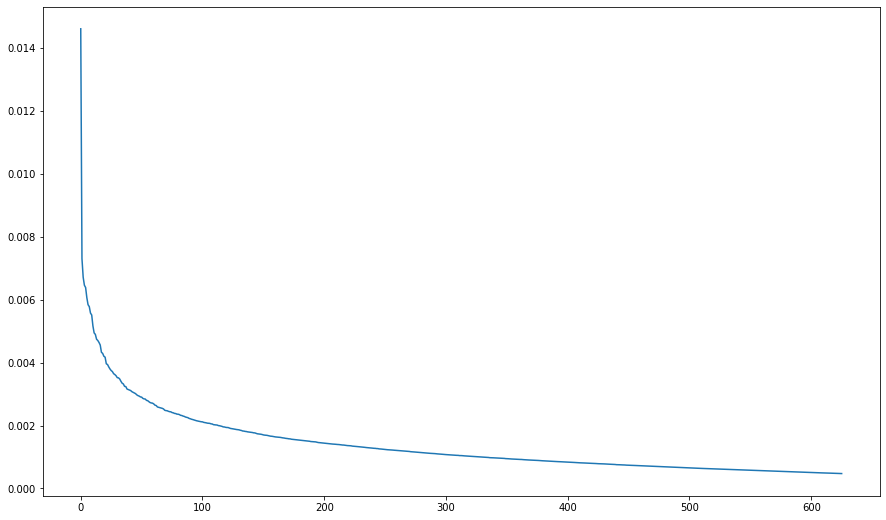

In [61]:
plt.figure(figsize=(15,9))
sns.lineplot(data=pca.explained_variance_)

In [62]:
pca=PCA(n_components=30)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [63]:
#import required metrics
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
#define function for algorithm
def ml_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #mean squared error
    print("Mean Squared Error :")
    print(mean_squared_error(y_test,y_pred,squared=False))
    print("\n")
    
    #classification report
    print("R2 Score :")
    print(r2_score(y_test,y_pred))
        
    #return model
    return model

Linear Regression

In [65]:
#import linear regression
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
#calling function
linear_model=ml_model(lr_model)
linear_model

Mean Squared Error :
0.1791617517903347


R2 Score :
0.047052351540656345


LinearRegression()

Random Forest

In [66]:
#import random forest
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()
#calling function
forest_model=ml_model(rf_model)
forest_model

C:\Users\hp\AppData\Local\Temp\ipykernel_7656\2332693128.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Mean Squared Error :
0.17485135889949668


R2 Score :
0.09235406682543446


RandomForestRegressor()

Support Vector Machine

In [67]:
#import random forest
from sklearn.svm import SVR

sv_model=SVR()
#calling function
vector_model=ml_model(sv_model)
vector_model

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error :
0.18203835231636162


R2 Score :
0.01620585361825766


SVR()

EXTREME GRADIENT BOOSTING(XG-BOOST)

In [68]:
#import random forest
from random import seed
from xgboost import XGBRegressor

xg_model=XGBRegressor(objective="reg:linear",n_estimators=40,max_depth=10,seed=25)
#calling function
xgb_model=ml_model(xg_model)
xgb_model

[12:07:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error :
0.18271542952930186


R2 Score :
0.008873955126993183


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=25, reg_alpha=0, ...)

From the above regression models,Linear regression model is my final model as the mean squared error is least compared to other models.

In [69]:
#save linear regression model for prediction
pickle.dump(linear_model,open("linear_model.pkl","wb"))